In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import statistics


In [3]:
df = pd.read_csv (r'/home/emonroe/Downloads/20210531_toEM/behavior_csv/senor_clean_contingencies_only_parsed_data.csv')
df #df is the dataframe containing the entire csv
df['day']= df['date'].ne(df['date'].shift()).cumsum()
df['diff_cont'] = df['contingency'].ne(df['contingency'].shift())
df['cont_num'] = df.groupby(['day','session'])['diff_cont'].cumsum()
del df['diff_cont']
df['new_cont'] = df['cont_num'].ne(df['cont_num'].shift())
df['day_chng'] = df['day'].ne(df['day'].shift())
df['stem_switch'] = df['stem'].ne(df['stem'].shift())
# df["stemChange"] = (df["stem"].shift(1, fill_value=df["stem"].head(1)) != df["stem"]).astype(int) #better way to calc?
for ix in range(len(df)):
    cont= str(df.loc[ix, 'contingency'])
    cont = [cont[i:i+2] for i in range(0, len(cont), 2)]
    cont = [int(i) for i in cont]
    df.loc[ix, 'glob_nom_avg'] = statistics.mean(cont)
df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,new_cont,day_chng,stem_switch,glob_nom_avg
0,0,4,B,1,805020202050,20201028,1,0,1,1,True,True,True,40.0
1,1,1,A,0,805020202050,20201028,1,1,1,1,False,False,True,40.0
2,2,2,A,0,805020202050,20201028,1,2,1,1,False,False,False,40.0
3,3,3,B,1,805020202050,20201028,1,3,1,1,False,False,True,40.0
4,4,4,B,0,805020202050,20201028,1,4,1,1,False,False,False,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13288,13288,2,A,1,508020208020,20201107,6,175,11,3,False,False,False,45.0
13289,13289,1,A,0,508020208020,20201107,6,176,11,3,False,False,False,45.0
13290,13290,2,A,0,508020208020,20201107,6,177,11,3,False,False,False,45.0
13291,13291,1,A,1,508020208020,20201107,6,178,11,3,False,False,False,45.0


In [4]:
df.loc[df.stem == "A", "ChooseA"] = "1"
df.loc[df.stem == "B", "ChooseB"] = "1"
df.loc[df.stem == "C", "ChooseC"] = "1"
df['ChooseA'] = df['ChooseA'].fillna(0)
df['ChooseB'] = df['ChooseB'].fillna(0)
df['ChooseC'] = df['ChooseC'].fillna(0)

binframe = df[['ChooseA','ChooseB','ChooseC','reward']]


In [5]:
df

,Unnamed: 0,leaf,stem,reward,contingency,date,session,trial,day,cont_num,new_cont,day_chng,stem_switch,glob_nom_avg,ChooseA,ChooseB,ChooseC
0,0,4,B,1,805020202050,20201028,1,0,1,1,True,True,True,40.0,0,1,0
1,1,1,A,0,805020202050,20201028,1,1,1,1,False,False,True,40.0,1,0,0
2,2,2,A,0,805020202050,20201028,1,2,1,1,False,False,False,40.0,1,0,0
3,3,3,B,1,805020202050,20201028,1,3,1,1,False,False,True,40.0,0,1,0
4,4,4,B,0,805020202050,20201028,1,4,1,1,False,False,False,40.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13288,13288,2,A,1,508020208020,20201107,6,175,11,3,False,False,False,45.0,1,0,0
13289,13289,1,A,0,508020208020,20201107,6,176,11,3,False,False,False,45.0,1,0,0
13290,13290,2,A,0,508020208020,20201107,6,177,11,3,False,False,False,45.0,1,0,0
13291,13291,1,A,1,508020208020,20201107,6,178,11,3,False,False,False,45.0,1,0,0


In [6]:
#need swapConting, newDays, and chgEpoch 
swapConting = (df[df['cont_num'].ne(df['cont_num'].shift())].index).tolist()
newDays = (df[df['day'].ne(df['day'].shift())].index).tolist()
chgEpoch = (df[df['session'].ne(df['session'].shift())].index).tolist()
Alist= binframe['ChooseA'].tolist()
Blist= binframe['ChooseB'].tolist()
Clist= binframe['ChooseC'].tolist()

Alist = [int(x) for x in Alist]
Blist = [int(x) for x in Blist]
Clist = [int(x) for x in Clist]



In [7]:
binframe1=binframe[0:int(len(binframe)/8)]
binframe1['ChooseA'] = [int(x) for x in binframe1['ChooseA']]
binframe1['ChooseB'] = [int(x) for x in binframe1['ChooseB']]
binframe1['ChooseC'] = [int(x) for x in binframe1['ChooseC']]

Alist = binframe1['ChooseA']+binframe1['reward']
Blist = binframe1['ChooseB']+binframe1['reward']
Clist = binframe1['ChooseC']+binframe1['reward']




# binframe1['rewornot']= binframe1.sum(axis=1)

# Alist = binframe[(binframe1['ChooseA']==1) & (binframe1['rewornot'])]
# Blist= binframe1['ChooseB'].tolist()
# Clist= binframe1['ChooseC'].tolist()

# Alist = [int(x) for x in Alist]
# Blist = [int(x) for x in Blist]
# Clist = [int(x) for x in Clist]

swapConting1 = swapConting[0:int(len(swapConting)/8)]
newDays1 = newDays[0:int(len(newDays)/8)]
chgEpoch1 = chgEpoch[0:int(len(chgEpoch)/8)]

<ipython-input-7-28d97dbd24f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binframe1['ChooseA'] = [int(x) for x in binframe1['ChooseA']]
<ipython-input-7-28d97dbd24f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binframe1['ChooseB'] = [int(x) for x in binframe1['ChooseB']]
<ipython-input-7-28d97dbd24f7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

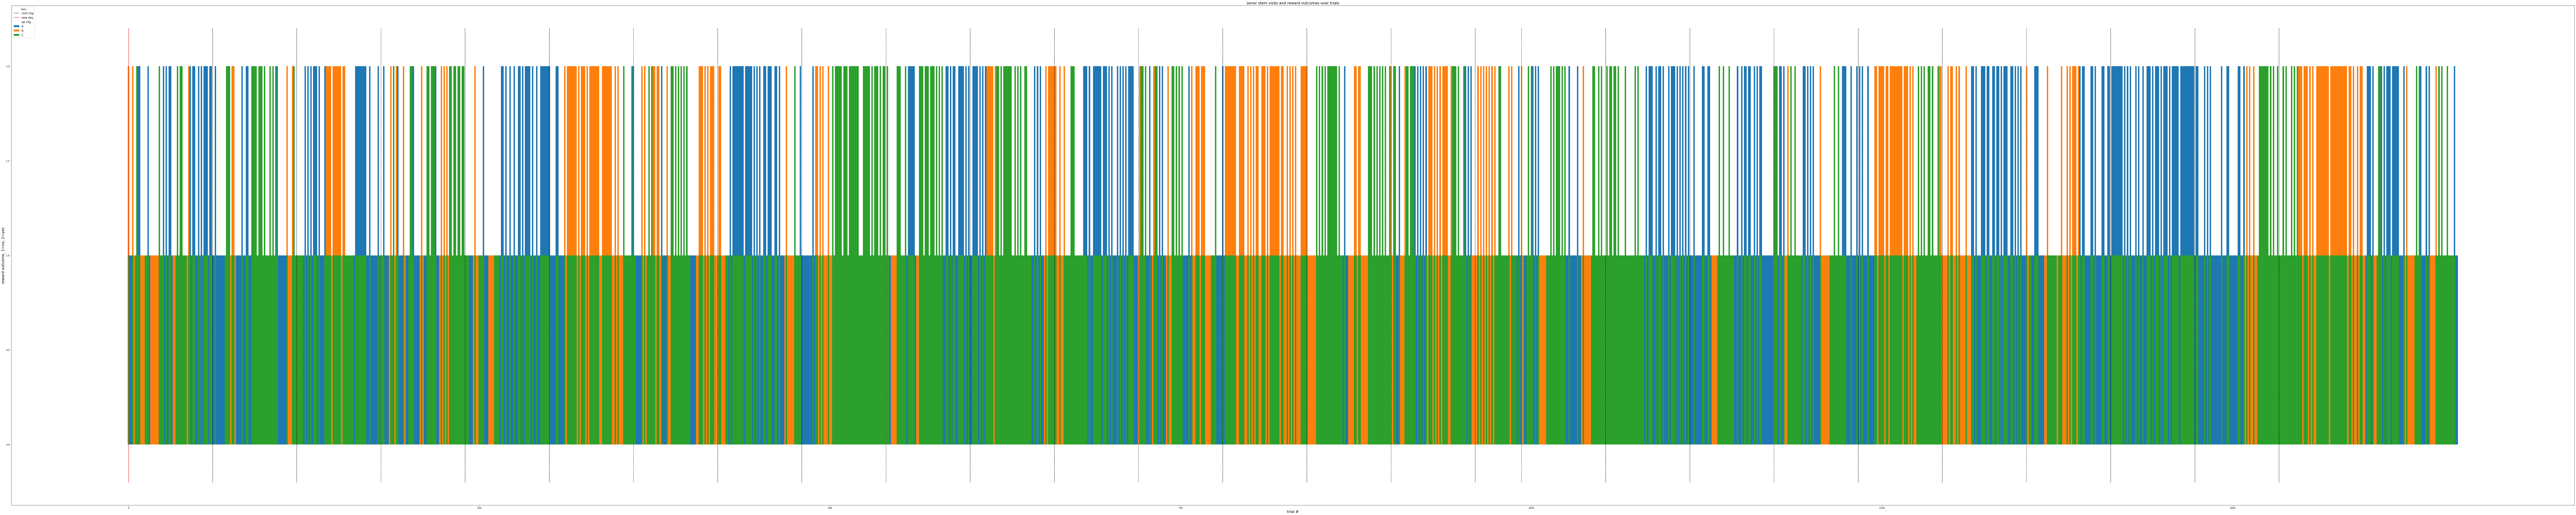

In [8]:
x=[i for i in range(0,len(binframe1))]
plt.figure(figsize = (200,40))
plt.bar(x,Alist,width=1)
plt.bar(x,Blist,width=1)
plt.bar(x,Clist,width=1)
plt.xlabel('trial #', fontsize = 16)
plt.ylabel('reward outcome, 1=no, 2=yes', fontsize = 16)
plt.vlines(swapConting1,-0.2,2.2,colors='black',linestyle='--',label='chg contingency')
plt.vlines(newDays1,-0.2,2.2,colors='red',linestyle='-',label='new day')
plt.vlines(chgEpoch1,-0.2,2.2,colors='pink',linestyle=':',label='chg epoch')
plt.legend(['cont chg','new day','ep chg','A','B','C'],title='stem',loc='upper left', fontsize = 12)
plt.title('senor stem visits and reward outcomes over trials', fontsize = 16)
plt.show()

In [106]:
#now want to plot this daily. and maybe even session by session. 

In [107]:
only_first_cont = df[df['cont_num'] == 1]

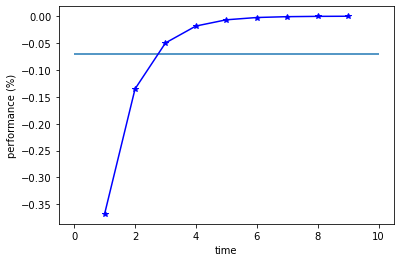

In [26]:
x= np.array([1,2,3,4,5,6,7,8,9])
#y=[2,,6]
z=np.exp(-x)*-1
w=np.exp(y)
plt.plot(x,z,color="blue",marker='*')
#plt.plot(y,w,color="red",marker='o')

plt.xlabel("time")
plt.ylabel("performance (%)")
plt.hlines(-.07,0,10)
plt.show()

In [21]:
.8*.35

0.27999999999999997

In [25]:
.35-.28

0.06999999999999995